In [56]:
import matsim
import pandas as pd
import geopandas
from collections import defaultdict
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString, Point
import xml.etree.ElementTree as ET 
import gzip
import shutil
from xml.etree.cElementTree import ElementTree

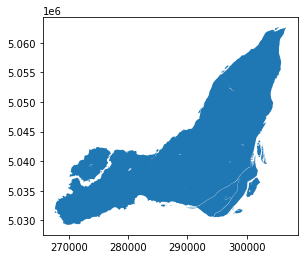

In [57]:
island = "/Users/MathildeMoliner/Downloads/limites-terrestres.geojson.json"
ile = geopandas.read_file(island)

ileMTM8 = ile.to_crs("EPSG:32188")
ileMTM8.plot()

moi = Point(-73.56198,45.52160)

def dedans(df, x ,y):
    point = Point(x,y)
    table = df.contains(point)
    for x in table:
        if x== True:
            return(True)
    return(False)
    
#dedans(ile, moi)


In [58]:
treePopulation = ET.parse(gzip.open('/Users/MathildeMoliner/Documents/Polytechnique/MATSim/create_input/decompress/input_plans.xml.gz','r'))
population  = treePopulation.getroot()


In [59]:
agent = population[1]
plan = agent[1]
home = plan[0]
x = float(home.get("x"))
y = float(home.get("y"))
x
point = Point(x,y)

dedans(ileMTM8, x,y)

True

In [60]:
montrealais=0
banlieusard=0

In [61]:
for person in population.iter('person'):
    carAvail = person[0][2]
    x = float(person[1][0].get('x'))
    y = float(person[1][0].get('y'))
    if dedans(ileMTM8,x,y) == True:
        # Ajouter la subpopulation
        carAvail.text='never'
        subpop=ET.SubElement(person[0],'attribute', attrib={'name': "subpopulation", 'class':"java.lang.String"})
        subpop.text="montrealais"
        montrealais+=1
        # Modifier le mode 
        for leg in person[1].iter('leg'):
            if leg.get('mode') == 'car':
                leg.set('mode','taxi')
                leg[0][0].text='taxi'
                if leg[1].get('start_link') == leg[1].get('end_link'):
                    leg.set('mode','walk')
                    leg[0][0].text='walk'
                    leg[1].text=''
            if leg.get('mode') == 'car_passenger':
                leg.set('mode','taxi')
                leg[0][0].text='taxi'
                if leg[1].get('start_link') == leg[1].get('end_link'):
                    leg.set('mode','walk')
                    leg[0][0].text='walk'
                    leg[1].text=''
    else: 
        # Ajouter la subpopulation
        subpop=ET.SubElement(person[0],'attribute', attrib={'name': "subpopulation", 'class':"java.lang.String"})
        subpop.text="banlieusard"
        banlieusard+=1

In [62]:
montrealais

71777

In [63]:
banlieusard

78295

In [64]:
path = '/Users/MathildeMoliner/Documents/Polytechnique/MATSim/create_input/PUM/sce1/plans.xml.gz'
f = gzip.open(path, 'wb')
f.write('<?xml version="1.0" encoding="utf-8"?><!DOCTYPE population SYSTEM "http://www.matsim.org/files/dtd/population_v6.dtd">'.encode('utf8'))
ElementTree(population).write(f) 
f.close()